In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv("cleaned_primary_school_GDP.csv")
df

,Country,Indicator,Sex,Education Level,Wealth Quintile,Residence,Value,Time,GDP
0,Australia,Proportion of students at the end of primary a...,Female,Primary education,Total,Total,63.93016,2015,47232.62912
1,Australia,Proportion of students at the end of primary a...,Male,Primary education,Total,Total,65.67903,2015,47232.62912
2,Australia,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,68.00000,2019,52669.47390
3,Austria,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,84.00000,2019,58091.27226
4,Austria,Proportion of students at the end of primary a...,Female,Primary education,Total,Total,98.08942,2016,52665.08742
...,...,...,...,...,...,...,...,...,...
424,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,ural,1.10000,2016,12827.60358
425,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,rban,1.00000,2016,12827.60358
426,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,Total,1.00000,2016,12827.60358
427,South Africa,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,14.90000,2013,12616.60638


In [78]:
#“Do children in countries with a lower GDP have a lower primary education attendance rate?”

df2 = df[(df['Sex'] == "Total") 
        & (df['Indicator'] == 'Adjusted net attendance rate for children of primary school age') 
        & (df['Wealth Quintile'] == "Total") 
        & (df['Residence'] == "Total")].sort_values(['GDP'])

df3 = df2[['Country','Indicator','Value','GDP']]

df3.rename(columns = {'Value':'AttandanceRate'}, inplace = True)
df3['AttandanceRate'] = df3.AttandanceRate * 100

df3

,Country,Indicator,AttandanceRate,GDP
242,India,Adjusted net attendance rate for children of p...,9520.000,5789.404696
206,Indonesia,Adjusted net attendance rate for children of p...,9346.085,11050.882370
406,South Africa,Adjusted net attendance rate for children of p...,9846.198,12827.603580
76,China,Adjusted net attendance rate for children of p...,9480.000,12865.800380
96,Colombia,Adjusted net attendance rate for children of p...,9420.000,13330.562040
18,Brazil,Adjusted net attendance rate for children of p...,9393.427,15422.748590
292,Mexico,Adjusted net attendance rate for children of p...,9880.000,20354.829510
132,Costa Rica,Adjusted net attendance rate for children of p...,9564.747,21283.952700
367,Turkey,Adjusted net attendance rate for children of p...,9543.694,22373.136550
55,Chile,Adjusted net attendance rate for children of p...,8880.000,24402.005370


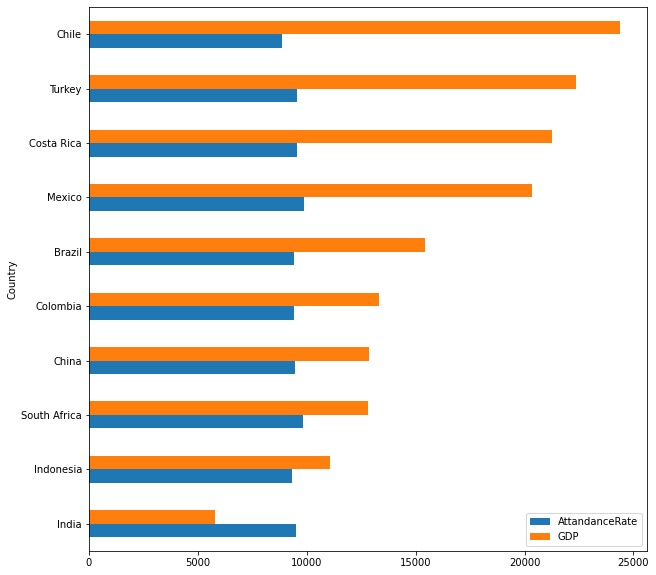

In [74]:
df3 = df3.set_index("Country")

ax = df3.plot.barh(figsize=(10, 10))